<a href="https://colab.research.google.com/github/gautamV19/TSA-Stock-Price/blob/master/TSA_Microsoft_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis on Microsoft Stock Dataset



#### **Description**
Here we are going to use time series model and CNN (A deep learning model) on Microsoft Stock
1. Startup
2. Data Description
3. Data Cleaning
4. Smoothing methods
    - Simple exponential smoothing
    - Double exponential smoothing
    - ADF Fuller
5. Forcasting
    - ARIMA
    - GARCH
6. CNN Model

## Startup

#### Importing Libraries and getting Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import yfinance as yf
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
ticker_symbol = "MSFT"

start_date = "2013-01-01"
end_date = "2023-01-01"

# Fetch Microsoft stock data using yfinance
df = yf.download(ticker_symbol, start=start_date, end=end_date)
# df.drop(["Adj Close"], inplace=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620333,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317314,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899622,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858683,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744024,44703100


## Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


<Axes: xlabel='Date'>

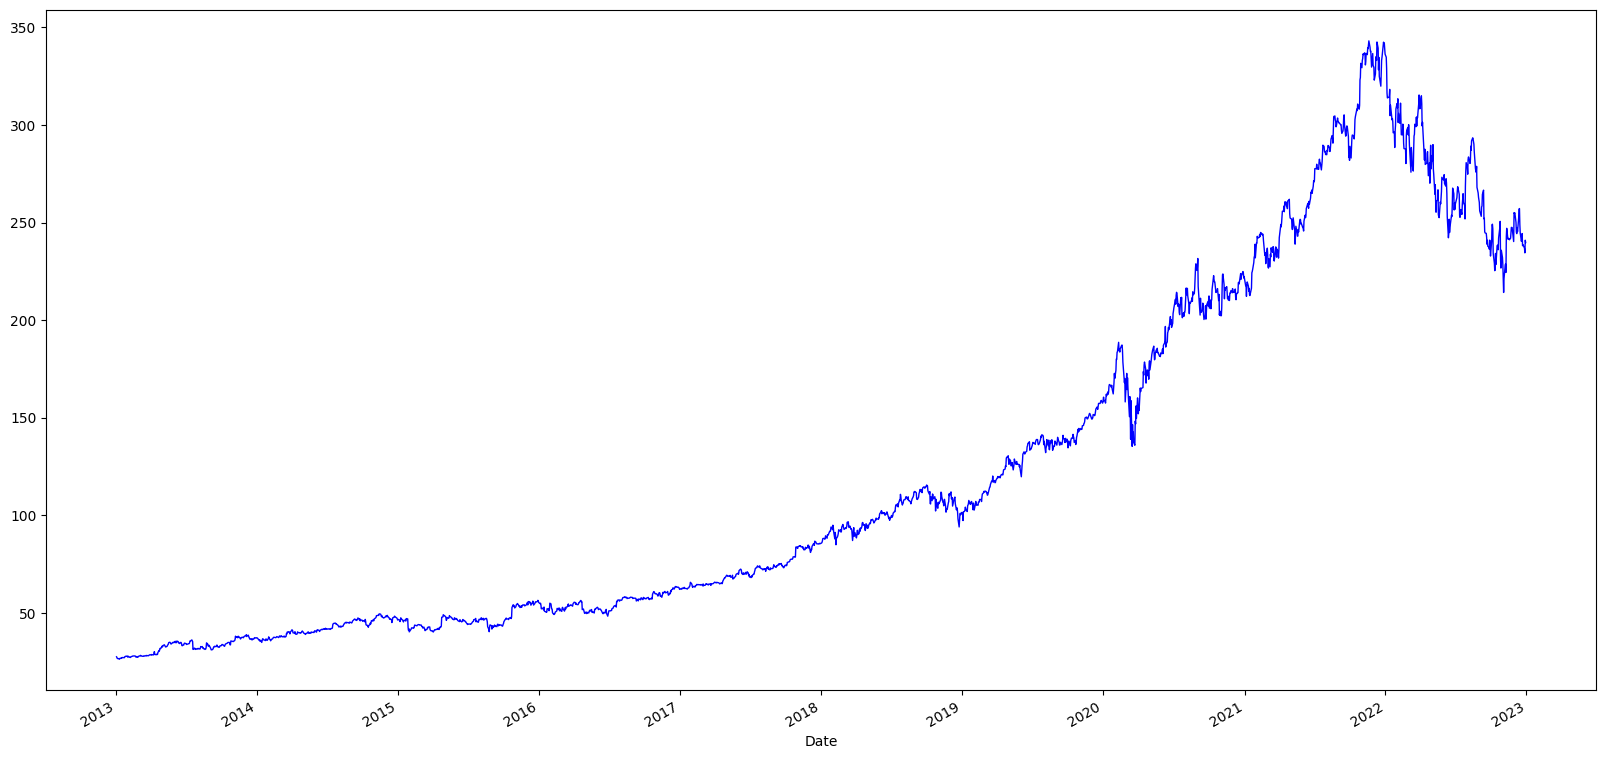

In [ ]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'Microsoft - Closing Price vs Time', linewidth = 1, color = 'blue')

The data has an **uptrend**

#### Objective: To study the trend in microsoft stock data and predict the furthur closing price

## Data Cleaning

In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values in the dataset

### Data Decomposition

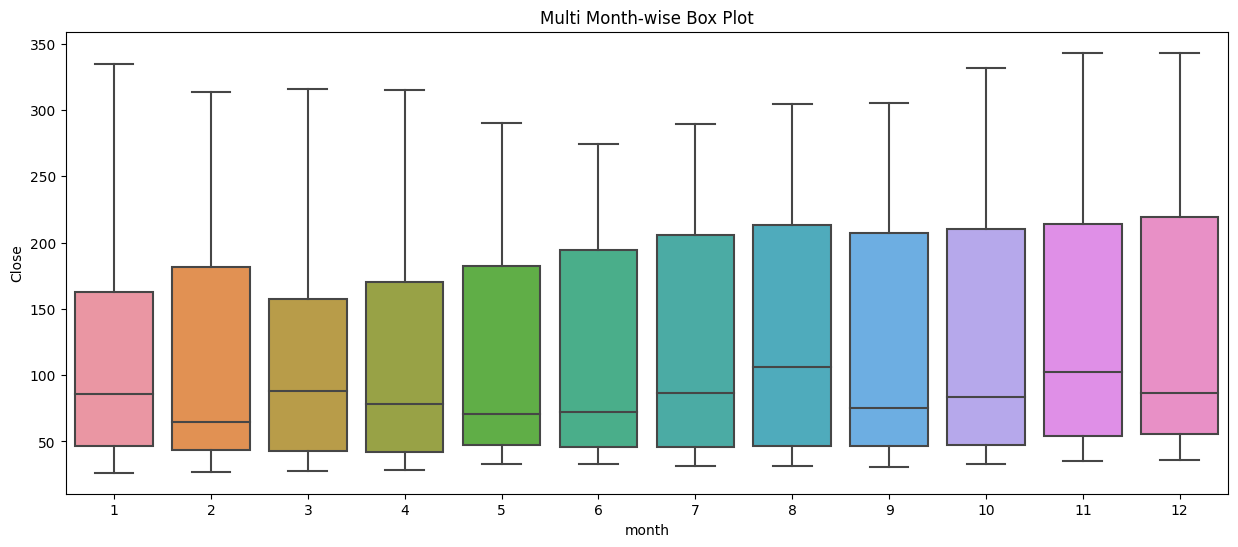

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

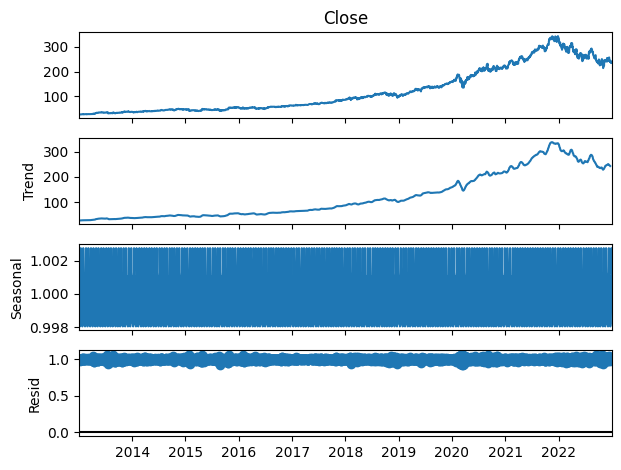

<Figure size 1600x900 with 0 Axes>

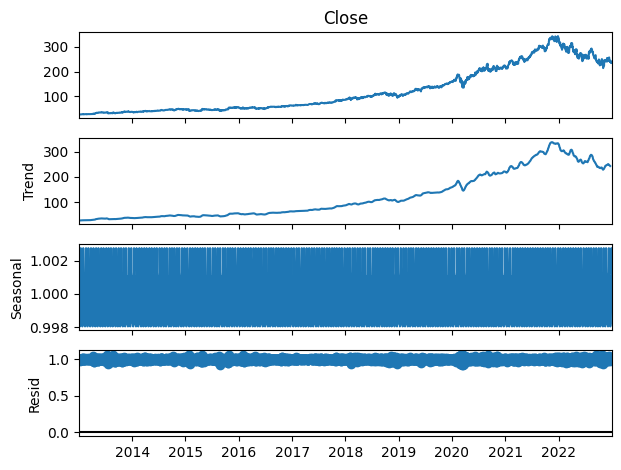

In [ ]:
plt.figure(figsize=(16,9))
result=seasonal_decompose(df['Close'], model='multiplicable', period=12)
result.plot()

## Smoothing methods

### Simple exponential smoothing

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn import metrics

#Splitting the dataset into
X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

- smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.
- optimized (bool) – Should the values that have not been set above be optimized automatically?

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
# temp_df = []
# df2 = pd.DataFrame(columns=['smoothing_parameter', 'RMSE'])
smoothing_parameter = []
RMSE =[]
data = []

temp_df = {}
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    data.append([i, rmse])

temp_df = pd.DataFrame(data, columns = ["smoothing_parameter", "RMSE"])
# temp_df.sort_values(by=['RMSE'])
temp_df

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 47447.06417478299
MAE is : 217.73899879455567
RMSE is : 217.82347021104724
MAPE is : 88.73621588334856
R2 is : -1288.582459718781

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 133.8893130417187
MAE is : 9.918783074497606
RMSE is : 11.571054966670875
MAPE is : 3.9857226408278628
R2 is : -2.6390304151666126

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 98.84889067779929
MAE is : 8.10910474317458
RMSE is : 9.942277942091504
MAPE is : 3.250653409430013
R2 is : -1.686652963630543

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 68.94706218759067
MAE is : 6.360094046179214
RMSE is : 8.303436769650906
MAPE is : 2.544115081445468
R2 is : -0.873939380500429

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 55.584337365351985
MAE is : 5.546441084215377
RMSE is : 7.455490417494478
MAPE is : 2.2187056579371216
R2 is : -0.5107486152862062



,smoothing_parameter,RMSE
0,0.0,217.823470
1,0.1,11.571055
2,0.2,9.942278
3,0.3,8.303437
4,0.4,7.455490
5,0.5,7.116780
6,0.6,7.017122
7,0.7,7.013345
8,0.8,7.036053
9,0.9,7.055714


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 133.8893130417187
MAE is : 9.918783074497606
RMSE is : 11.571054966670875
MAPE is : 3.9857226408278628
R2 is : -2.6390304151666126



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 49.71661394851661
MAE is : 5.243267265476501
RMSE is : 7.05100091820421
MAPE is : 2.099712515911145
R2 is : -0.3512674476220181



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,2488
Model:,SimpleExpSmoothing,SSE,18986.806
Optimized:,True,AIC,5060.276
Trend:,None,BIC,5071.914
Seasonal:,None,AICC,5060.292
Seasonal Periods:,None,Date:,"Sat, 02 Sep 2023"
Box-Cox:,False,Time:,14:45:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8713443,alpha,True
initial_level,27.620001,l.0,False


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

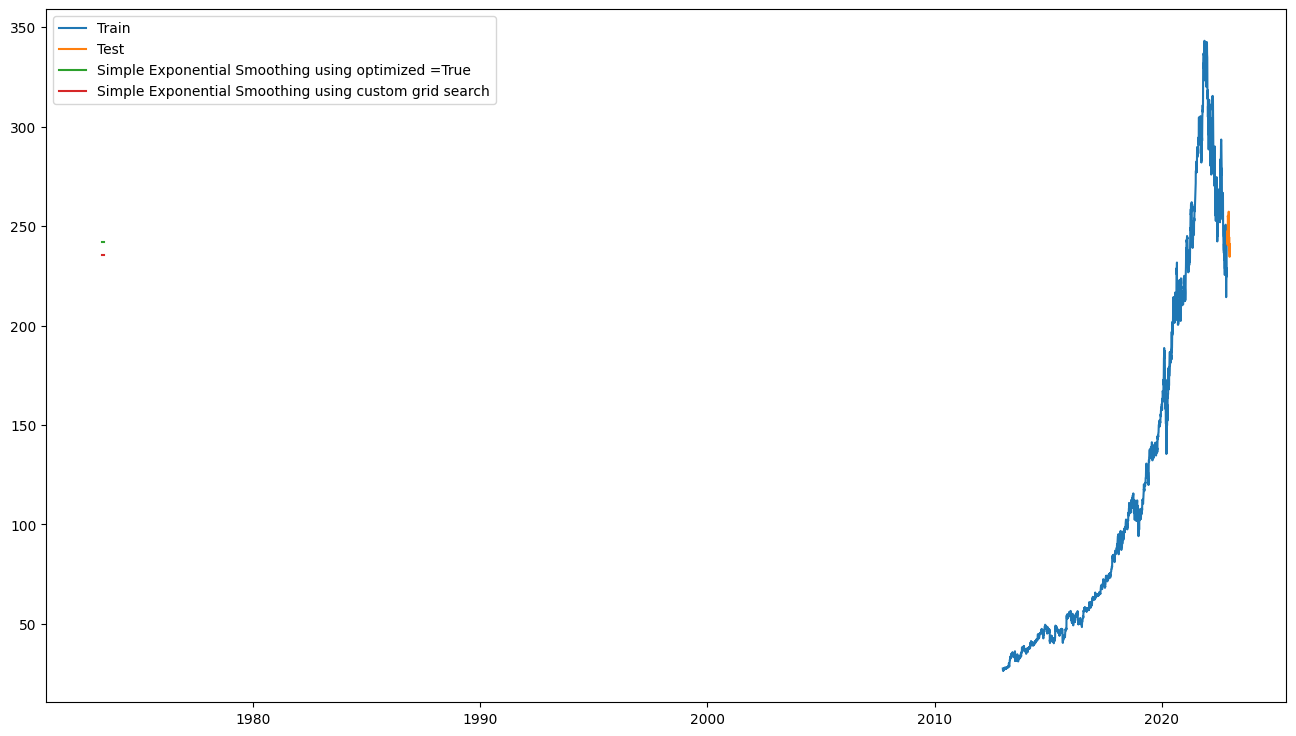

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

### Double exponential smoothing

In [ ]:
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
# df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
data = []
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    rmse = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    data.append([smoothing_level, smoothing_slope, damping_slope, damped, rmse, r2])
    # df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
df_results_moni = pd.DataFrame(data, columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE', 'r2'])
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
2488    235.504385
2489    235.505168
2490    235.505246
2491    235.505254
2492    235.505254
2493    235.505255
2494    235.505255
2495    235.505255
2496    235.505255
2497    235.505255
2498    235.505255
2499    235.505255
2500    235.505255
2501    235.505255
2502    235.505255
2503    235.505255
2504    235.505255
2505    235.505255
2506    235.505255
2507    235.505255
2508    235.505255
2509    235.505255
2510    235.505255
2511    235.505255
2512    235.505255
2513    235.505255
2514    235.505255
2515    235.505255
2516    235.505255
2517    235.505255
dtype: float64
 RMSE is 11.571052917871993
0.1 0.2 0.1 True
2488    235.504809
2489    235.506375
2490    235.506532
2491    235.506548
2492    235.506549
2493    235.506550
2494    235.506550
2495    235.506550
2496    235.506550
2497    235.506550
2498    235.506550
2499    235.506550
2500    235.506550
2501    235.506550
2502    235.506550
2503    235.506550
2504    235.506550
2505    235.506550
2506    235

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
507,0.3,0.4,0.7,True,6.007386,0.019131


In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

Dep. Variable:,Close,No. Observations:,2488
Model:,Holt,SSE,26933.932
Optimized:,False,AIC,5934.186
Trend:,Additive,BIC,5957.463
Seasonal:,None,AICC,5934.220
Seasonal Periods:,None,Date:,"Sat, 02 Sep 2023"
Box-Cox:,False,Time:,14:47:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 121.75153408569493
MAE is : 9.303199108727261
RMSE is : 11.034107761196413
MAPE is : 3.7433504142548895
R2 is : -2.3091329364949815



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,2488
Model:,Holt,SSE,19028.761
Optimized:,True,AIC,5069.767
Trend:,Additive,BIC,5093.044
Seasonal:,None,AICC,5069.801
Seasonal Periods:,None,Date:,"Sat, 02 Sep 2023"
Box-Cox:,False,Time:,14:47:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8701712,alpha,True
smoothing_trend,0.0036865,beta,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 54.17460300166085
MAE is : 5.392760199015805
RMSE is : 7.3603398699829645
MAPE is : 2.1552248574649986
R2 is : -0.4724328893314458



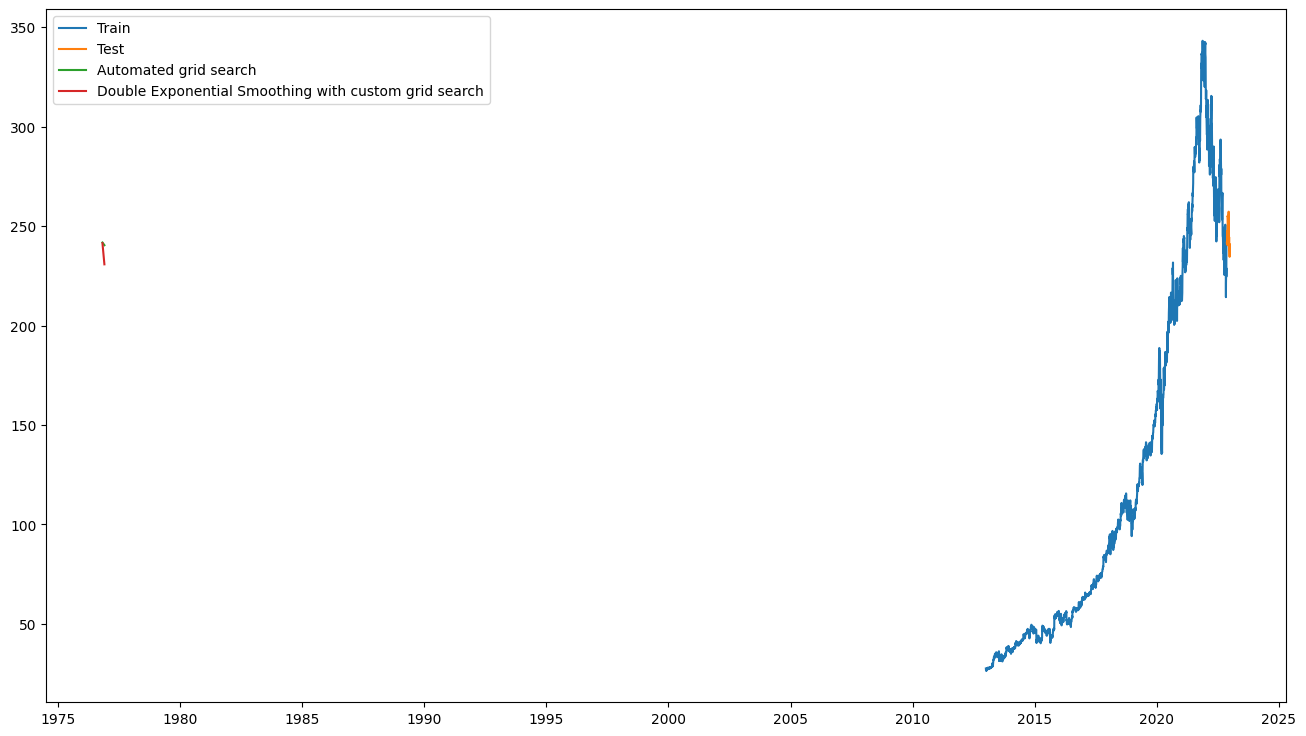

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()


### ADF fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:5], index=['Test Statistic',
                                             'p-value','No Lags Used',
                                             'Number of Observations Used',
                                             ' Critical values'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
       # Critical values for the ADF test for 1%, 5%, and 10% significance levels
       #  with the constant model are −3.43, −2.87, and −2.57, respectively.
    print(dfoutput)

    p_value = dftest[1]
    if p_value <= 0.05 :
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close'] , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                         -0.420386
p-value                                                                 0.906639
No Lags Used                                                                   9
Number of Observations Used                                                 2508
 Critical values               {'1%': -3.432960050084045, '5%': -2.8626931078...
Critical Value (1%)                                                     -3.43296
Critical Value (5%)                                                    -2.862693
Critical Value (10%)                                                   -2.567384
dtype: object
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


#### 1st Differencing

<Axes: xlabel='Date'>

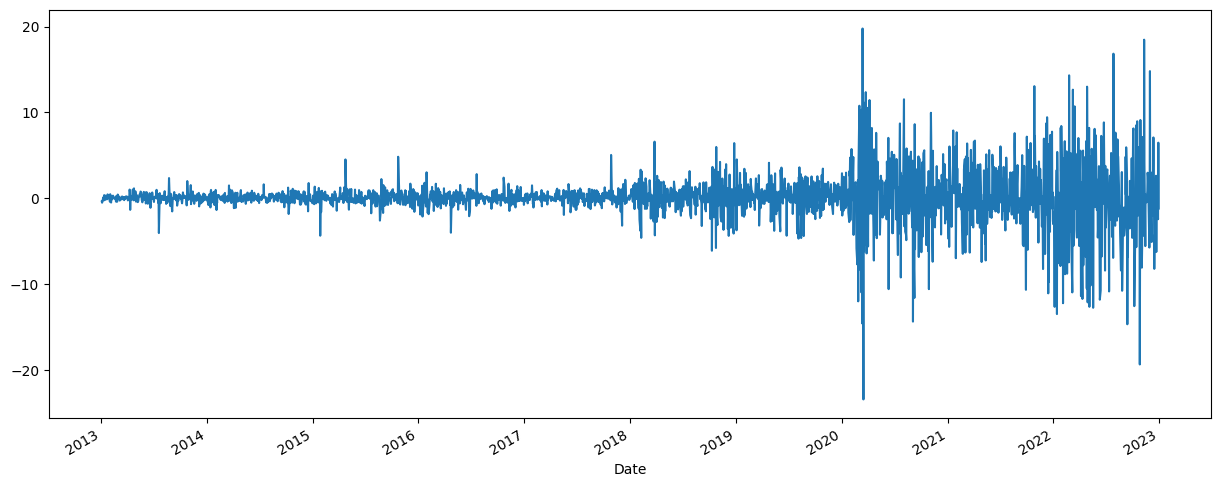

In [ ]:
close = df['Close'].diff().dropna()
close.plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(close , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                         -17.06583
p-value                                                                      0.0
No Lags Used                                                                   8
Number of Observations Used                                                 2508
 Critical values               {'1%': -3.432960050084045, '5%': -2.8626931078...
Critical Value (1%)                                                     -3.43296
Critical Value (5%)                                                    -2.862693
Critical Value (10%)                                                   -2.567384
dtype: object
Conclusion:====>
Reject the null hypothesis
Data is stationary


#### Why it is a time series problem

By analyzing the previous trend of the stock's closing price we can forcast the upcoming price

## Forcasting

### ARIMA

#### Applying Auto ARIMA on stationary dataset

In [ ]:
from pmdarima import auto_arima

In [ ]:
from pmdarima import auto_arima
arima = auto_arima(df['Close'], trace=True, suppress_warnings=True)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12313.822, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12350.879, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12313.421, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12313.211, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12351.141, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12315.208, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12315.210, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12316.894, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12314.217, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.452 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6153.606
Date:                Sat, 02 Sep 2023   AIC                          12313.211
Time:                        14:47:24   BIC                          12330.704
Sample:                             0   HQIC                         12319.560
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0844      0.049      1.709      0.088      -0.012       0.181
ma.L1         -0.1259      0.010    -13.086      0.000      -0.145      -0.107
sigma2         7.7814      0.097     80.274      0.000       7.591       7.971
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8966.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              45.45   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Train Test Split

In [ ]:
split = 200

In [ ]:
train = df.iloc[:-split]
train

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620333,52899300,1,2013
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317314,48294400,1,2013
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899622,52521100,1,2013
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858683,37110400,1,2013
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744024,44703100,1,2013
...,...,...,...,...,...,...,...,...
2022-03-10,283.019989,286.600006,280.579987,285.589996,281.602325,30628000,3,2022
2022-03-11,287.959991,289.510010,279.429993,280.070007,276.159485,27209300,3,2022
2022-03-14,280.339996,285.399994,275.820007,276.440002,272.580170,30660700,3,2022


In [ ]:
test = df.iloc[-split:]
test

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
2022-03-17,293.290009,295.609985,289.369995,295.220001,291.097900,30816600,3,2022
2022-03-18,295.369995,301.000000,292.730011,300.429993,296.235138,43390600,3,2022
2022-03-21,298.890015,300.140015,294.899994,299.160004,294.982880,28351200,3,2022
2022-03-22,299.799988,305.000000,298.769989,304.059998,299.814514,27599700,3,2022
2022-03-23,300.510010,303.230011,297.720001,299.489990,295.308258,25715400,3,2022
...,...,...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112076,21207000,12,2022
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354080,16688600,12,2022
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100,12,2022


In [ ]:
print(f"Shape:\n> df: {df.shape}\n> train: {train.shape}\n> test: {test.shape}")

Shape:
> df: (2518, 8)
> train: (2318, 8)
> test: (200, 8)


#### Fitting the ARIMA(1,1,0) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['Close'], order=(1,0,0))
arima = model.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2318
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5315.819
Date:                Sat, 02 Sep 2023   AIC                          10637.637
Time:                        14:47:24   BIC                          10654.883
Sample:                             0   HQIC                         10643.922
                               - 2318                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.1959    282.811      0.397      0.692    -442.104     666.496
ar.L1          0.9998      0.001   1719.911      0.000       0.999       1.001
sigma2         5.7272      0.061     94.328      0.000       5.608       5.846
===================================================================================
Ljung-Box (L1) (Q):                  76.36   Jarque-Bera (JB):             17715.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              36.74   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prediction using ARIMA

In [ ]:
results = arima.predict(start = 0, end = len(df)-1, typ='levels')
print(results[:5])

0    112.195908
1     27.634684
2     27.264747
3     26.754835
4     26.704845
Name: predicted_mean, dtype: float64


In [ ]:
results.index = df.index

In [ ]:
pred = pd.DataFrame({'Close':np.array(df['Close']),'Close_pred':results})
pred

,Close,Close_pred
Date,,
2013-01-02,27.620001,112.195908
2013-01-03,27.250000,27.634684
2013-01-04,26.740000,27.264747
2013-01-07,26.690001,26.754835
2013-01-08,26.549999,26.704845
...,...,...
2022-12-23,238.729996,288.294331
2022-12-27,236.960007,288.263760
2022-12-28,234.529999,288.233193


<Axes: xlabel='Date'>

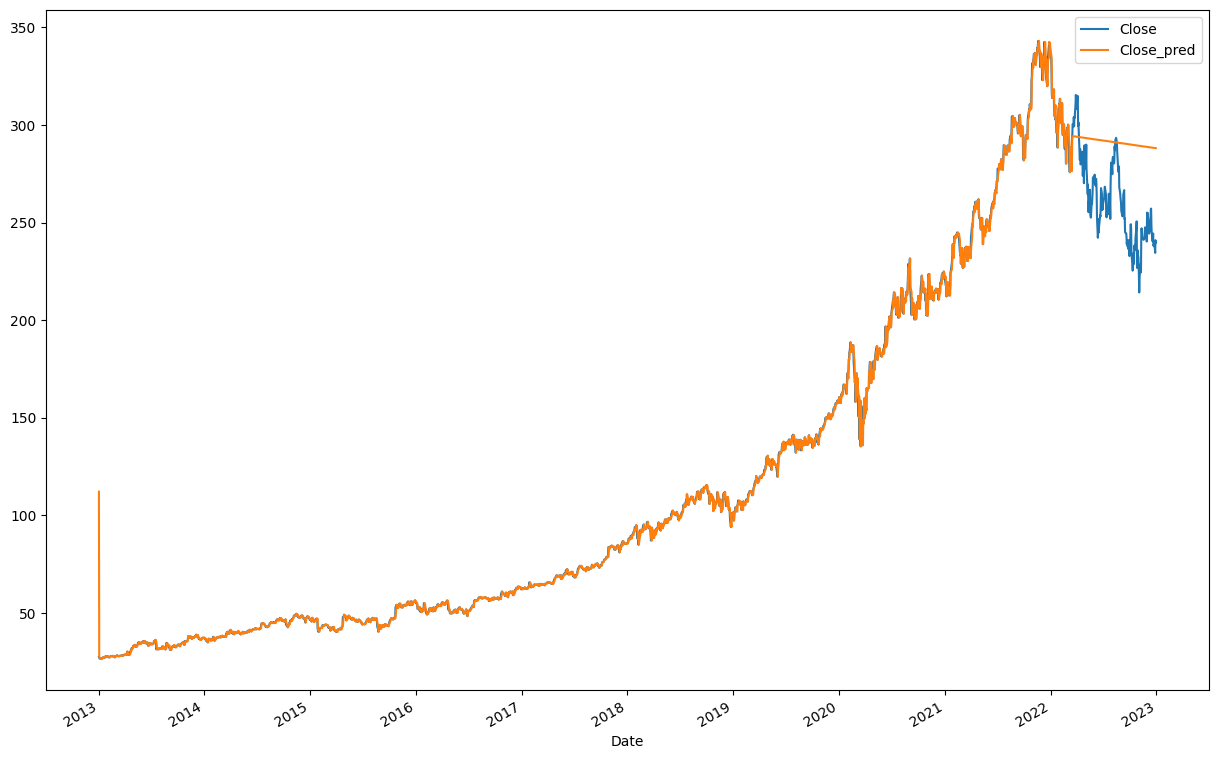

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(15,10))
pred['Close'].plot(legend=True)
pred['Close_pred'].plot(legend=True)

<Axes: xlabel='Date'>

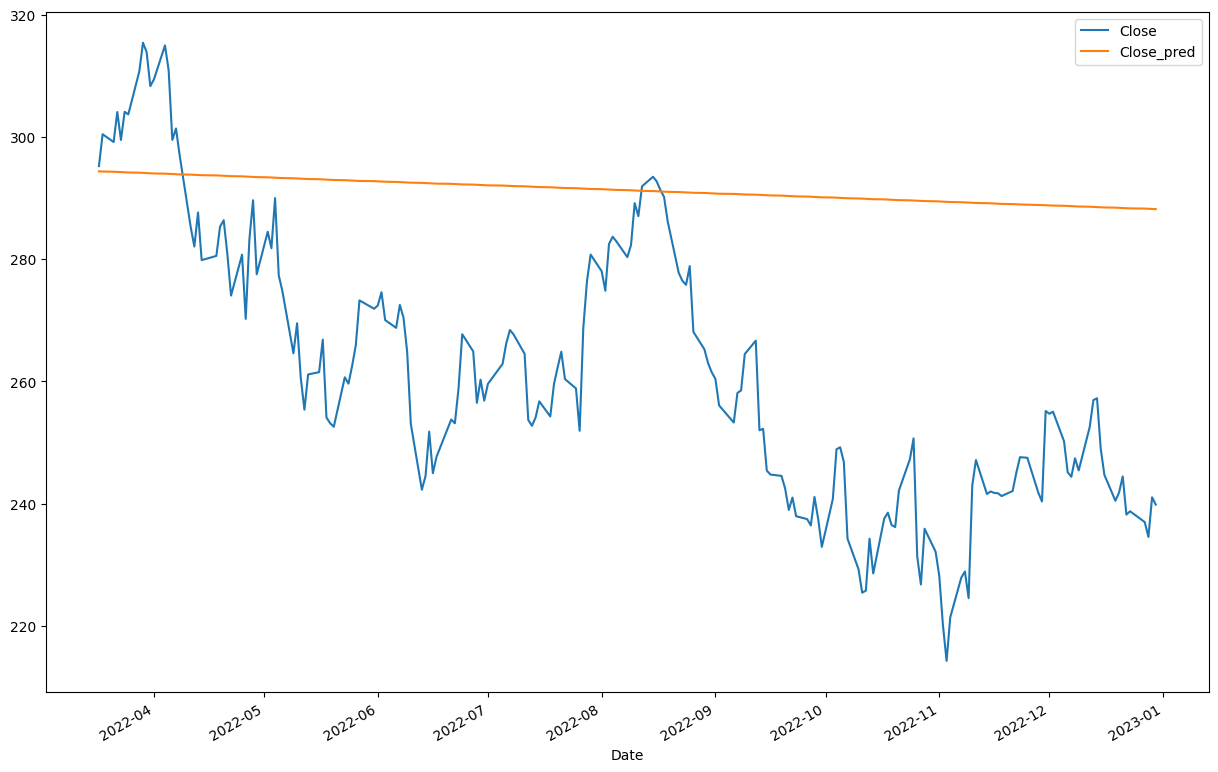

In [ ]:
pyplot.figure(figsize=(15,10))
pred['Close'][-split:].plot(legend=True)
pred['Close_pred'][-split:].plot(legend=True)

#### **Because of volatility in the stock dataset ARIMA model cannot be used to forcast the future values.**

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
ticker_symbol = "MSFT"

start_date = "2013-01-01"
end_date = "2023-01-01"

df = pd.DataFrame()

# Fetch Microsoft stock data using yfinance
df['Close'] = yf.download(ticker_symbol, start=start_date, end=end_date)['Close']
# df.drop(["Adj Close"], inplace=True)
df.head()

# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time series /Datasets/Microsoft_Stock.csv')

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2013-01-02,27.620001
2013-01-03,27.250000
2013-01-04,26.740000
2013-01-07,26.690001
2013-01-08,26.549999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2518 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


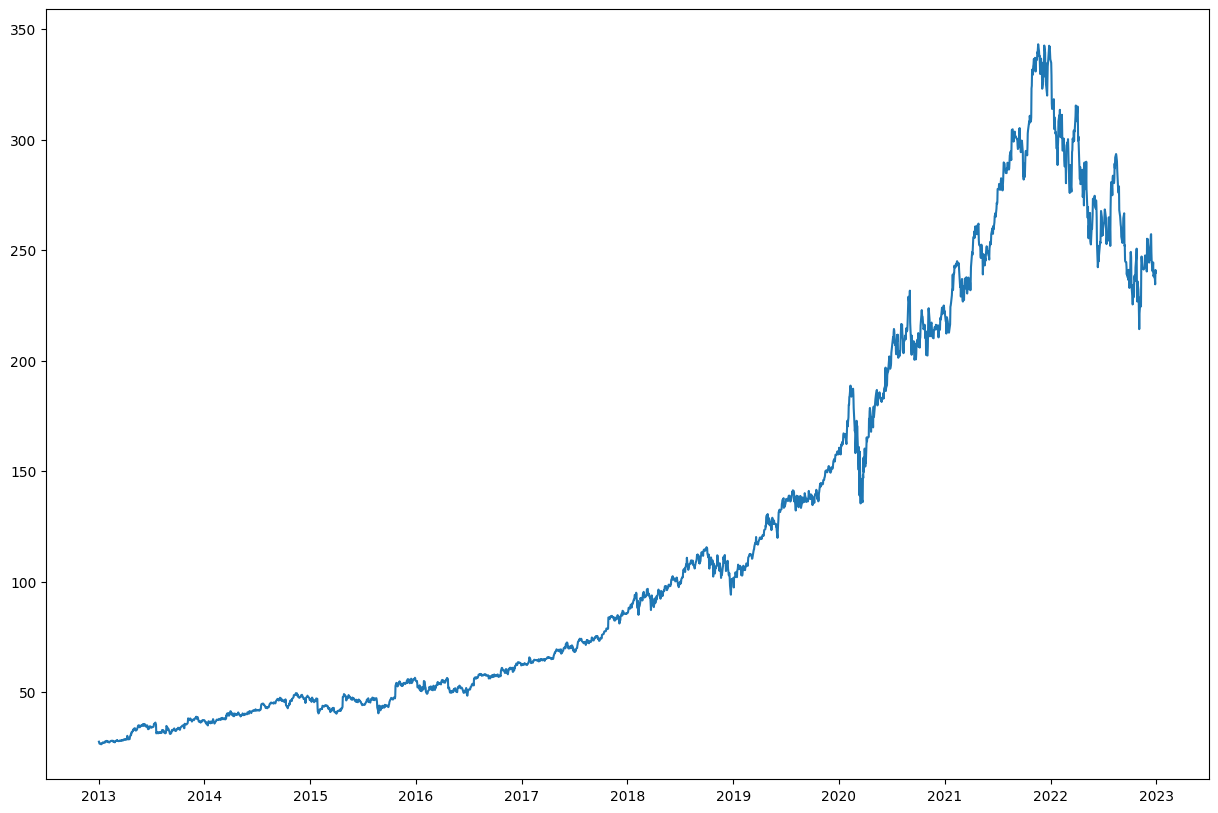

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df)

### GARCH

#### Applying 1st differencing to make the data stationary

<Axes: xlabel='Date'>

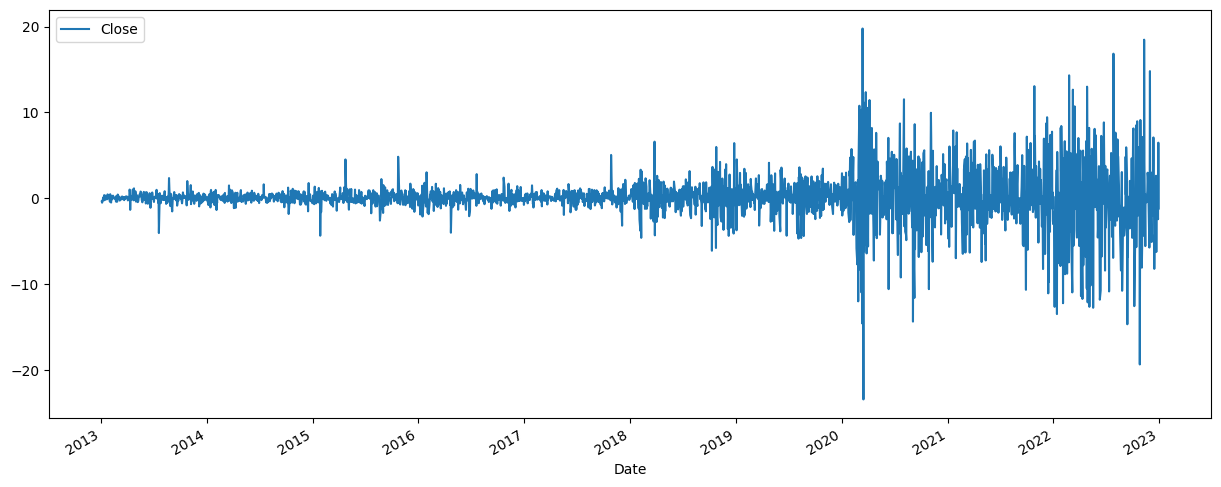

In [ ]:
df = df.diff().dropna()
df.plot(figsize=(15,6))

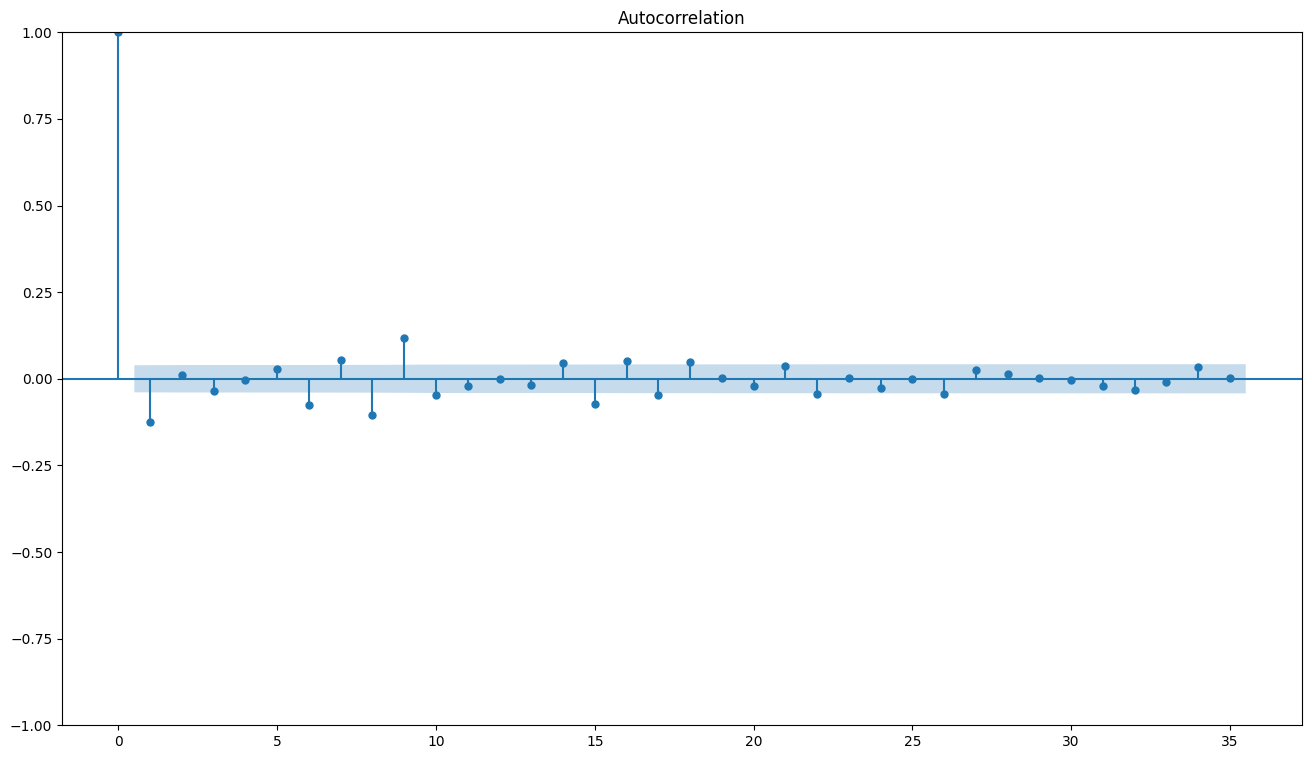

In [ ]:
plot_acf(df)
plt.show()

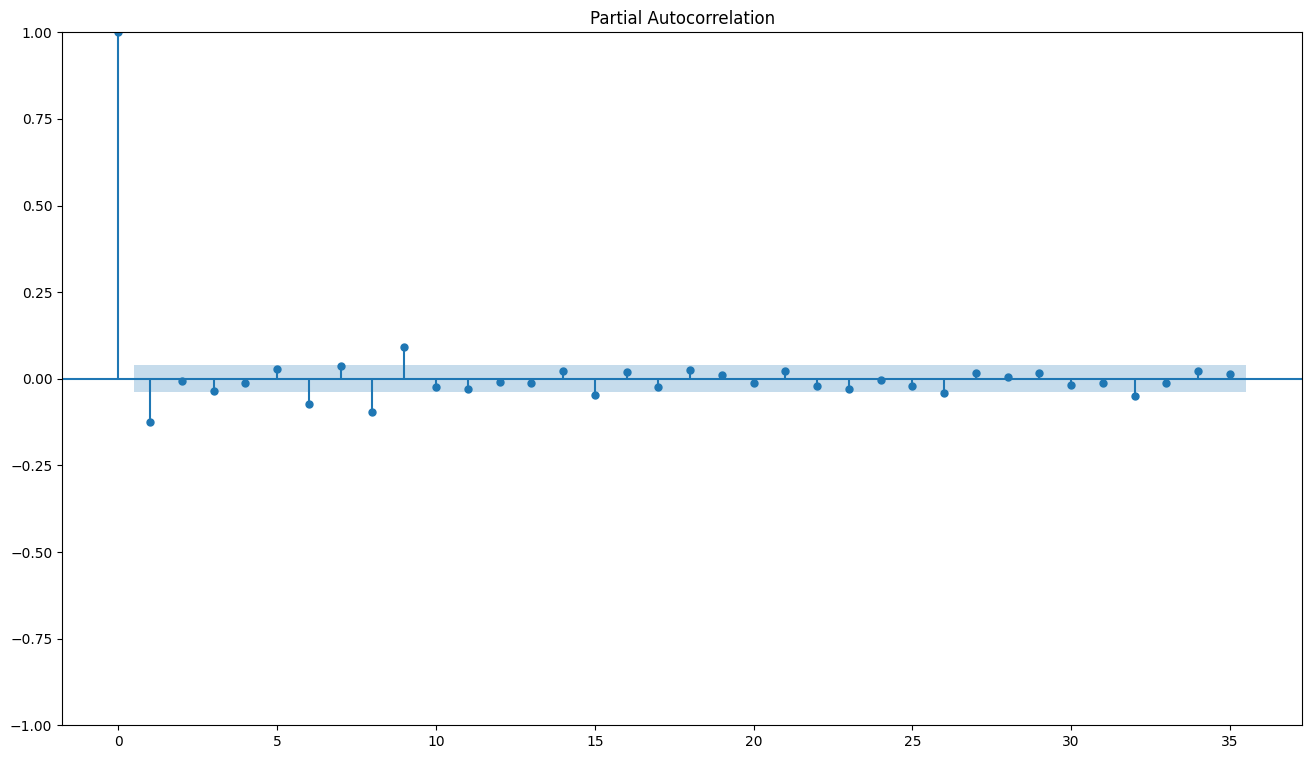

In [ ]:
plot_pacf(df)
plt.show()

#### GARCH(1,1) model

In [ ]:
from arch import arch_model
garch = arch_model(df,vol='Garch', p=1, q=1)
result = garch.fit()
result.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3001762903255.8604
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1899091905.068771
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5069.073170863475
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4711.239704784731
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4669.162857923319
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4643.943610953378
Iteration:      7,   Func. Count:     45,   Neg. LLF: 4608.841542762508
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4575.547051659221
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4539.143618361574
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4509.023513411942
Iteration:     11,   Func. Count:     69,   Neg. LLF: 4872.514064921692
Iteration:     12,   Func. Count:     75,   Neg. LLF: 4643.191886125465
Iteration:     13,   Func. Count:     81,   Neg. LLF: 4574.249085787194
Iteration:     14,   Func. Count:     87,   Neg. LLF: 4542.7460

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4468.92
Distribution:                  Normal   AIC:                           8945.84
Method:            Maximum Likelihood   BIC:                           8969.16
                                        No. Observations:                 2517
Date:                Sat, Sep 02 2023   Df Residuals:                     2516
Time:                        14:47:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0527  1.626e-02      3.239  1.201e-03 [2.079e-02,8.453e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.2899e-03  3.716e-03      1.424      0.155 [-1.993e-03,1.257e-02]
alpha[1]       0.0482  1.676e-02      2.874  4.051e-03  [1.532e-02,8.103e-02]
beta[1]        0.9518  1.837e-02     51.801      0.000      [  0.916,  0.988]
=============================================================================

Covariance estimator: robust
"""

### Rolling predictions

In [ ]:
def rolling_predictions(df, test_size):
  rolling_pred = []
  for i in range(test_size):
    train = df[:-(test_size-i)]
    model = arch_model(train, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    pred = res.forecast(horizon=1)
    rolling_pred.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_pred = pd.Series(rolling_pred, index = df.index[-test_size:])
  return rolling_pred

#### Test size: 10 %

In [ ]:
test_size = int(0.1*df.shape[0]) # 10 % test size
rolling_pred = rolling_predictions(df, test_size)

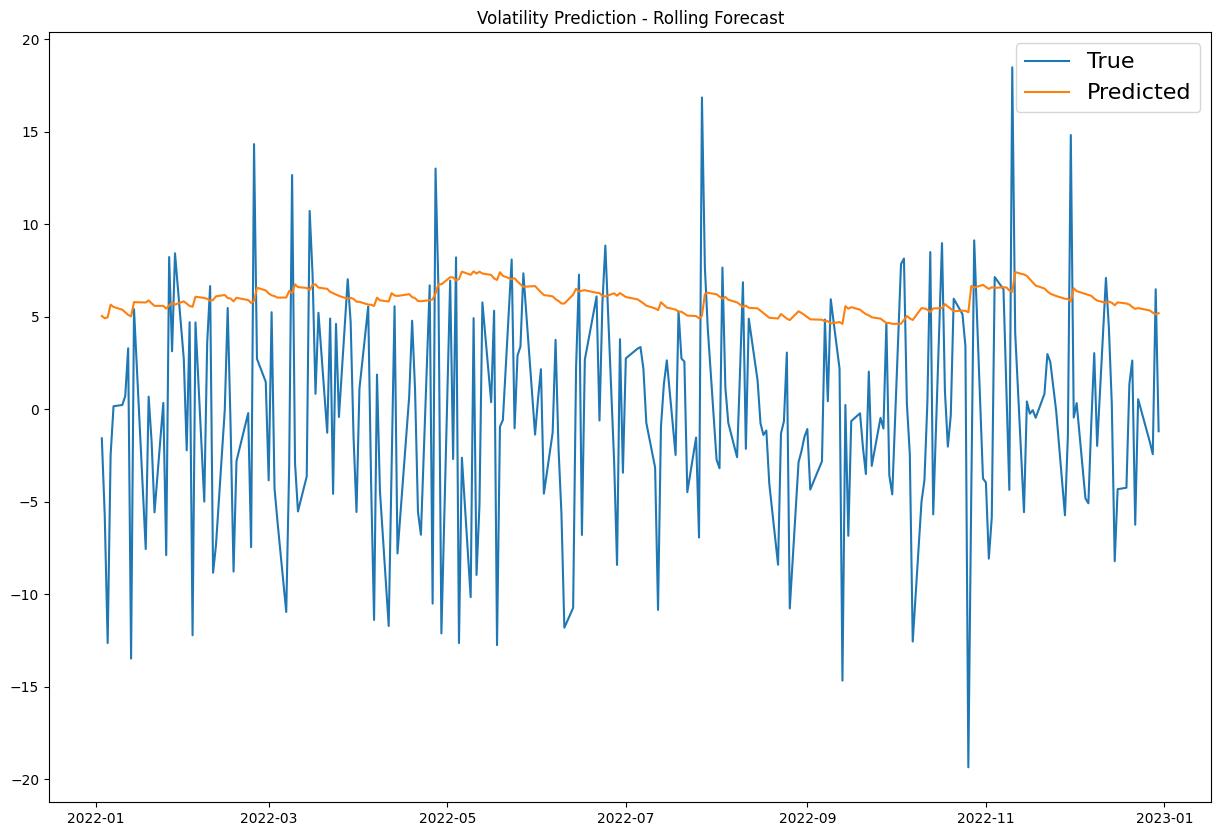

In [ ]:
plt.figure(figsize=(15,10))
true, = plt.plot(df[-test_size:])
pred, = plt.plot(rolling_pred)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True','Predicted'], fontsize=16)

#### Test size: 20 %

In [ ]:
test_size = int(0.2*df.shape[0])
rolling_pred = rolling_predictions(df, test_size)

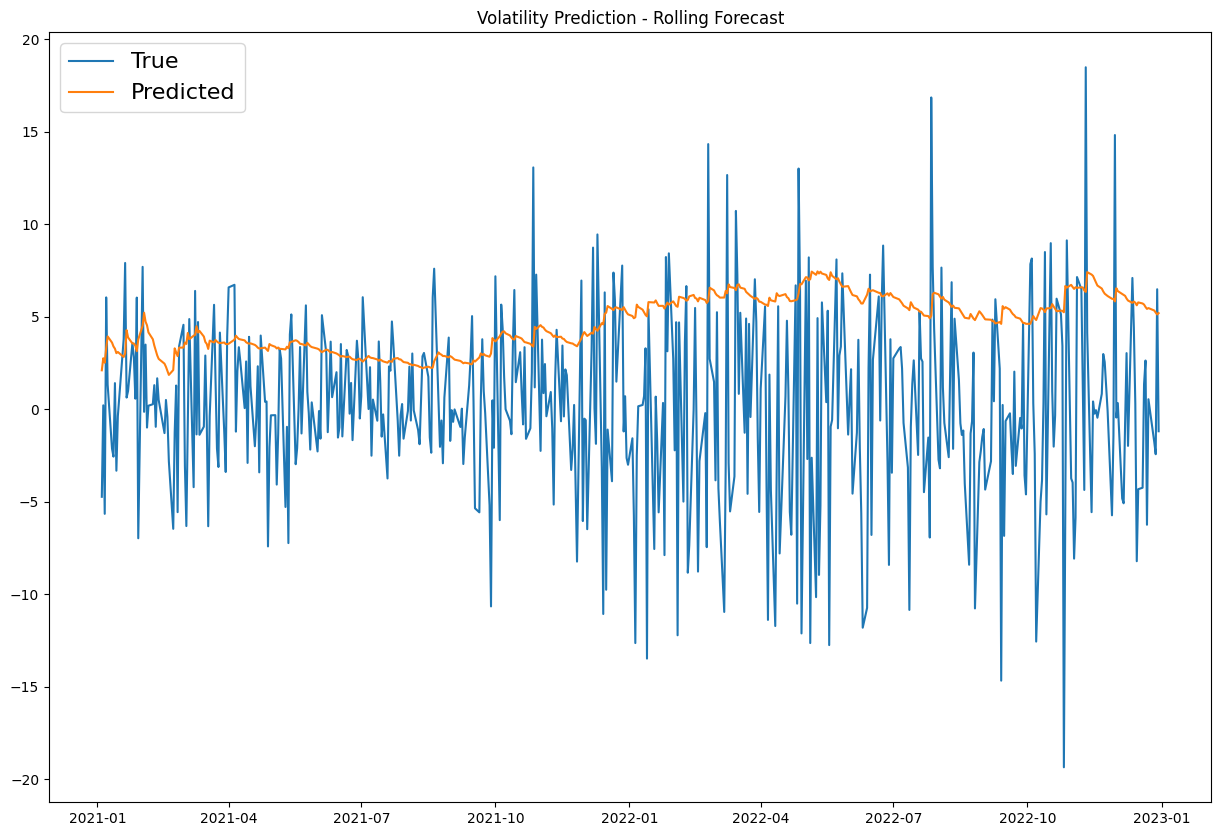

In [ ]:
plt.figure(figsize=(15,10))
true, = plt.plot(df[-test_size:])
pred, = plt.plot(rolling_pred)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True','Predicted'], fontsize=16)

## CNN Model

In [ ]:
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Input
# from keras.layers import Dense,Flatten
# from keras.layers.convolutional import Conv1D,MaxPooling1D

In [ ]:
ticker_symbol = "MSFT"

start_date = "2013-01-01"
end_date = "2023-01-01"

df = pd.DataFrame()

# Fetch Microsoft stock data using yfinance
df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


### Defining the function to extract the features and outputs from the sequence

In [ ]:
def split_sequence(sequence,steps):
  features,output=list(),list()

  for start in range(len(sequence)):
    end_index=start+steps

    if end_index>len(sequence)-1:
      break

    sequence_x,sequence_y=sequence[start:end_index],sequence[end_index]

    features.append(sequence_x)
    output.append(sequence_y)

  return array(features),array(output)

### Initializing the sequence using the Close of the Microsoft Stock

In [ ]:
sequence=df['Close']

#choosong a step size of 3

steps=3

features,output=split_sequence(sequence,steps)
print("The sequence is : ")
print(sequence)
print("The features are: ")
print(features)
print("The step size is : ",steps)
print("The output list is: ",output)


The sequence is : 
Date
2013-01-02     27.620001
2013-01-03     27.250000
2013-01-04     26.740000
2013-01-07     26.690001
2013-01-08     26.549999
                 ...    
2022-12-23    238.729996
2022-12-27    236.960007
2022-12-28    234.529999
2022-12-29    241.009995
2022-12-30    239.820007
Name: Close, Length: 2518, dtype: float64
The features are: 
[[ 27.62000084  27.25        26.73999977]
 [ 27.25        26.73999977  26.69000053]
 [ 26.73999977  26.69000053  26.54999924]
 ...
 [238.19000244 238.72999573 236.96000671]
 [238.72999573 236.96000671 234.52999878]
 [236.96000671 234.52999878 241.00999451]]
The step size is :  3
The output list is:  [ 26.69000053  26.54999924  26.70000076 ... 234.52999878 241.00999451
 239.82000732]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime
df['Date'] = df.index

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

### Reshaping the 2D input into 3D input data

In [ ]:
feature=1
X=features
X
features=features.reshape((features.shape[0],features.shape[1],feature))
print("THE SHAPE OF FEATURES")
print(features.shape)
print("The features after reshaping is: ")
print(features)

THE SHAPE OF FEATURES
(2515, 3, 1)
The features after reshaping is: 
[[[ 27.62000084]
  [ 27.25      ]
  [ 26.73999977]]

 [[ 27.25      ]
  [ 26.73999977]
  [ 26.69000053]]

 [[ 26.73999977]
  [ 26.69000053]
  [ 26.54999924]]

 ...

 [[238.19000244]
  [238.72999573]
  [236.96000671]]

 [[238.72999573]
  [236.96000671]
  [234.52999878]]

 [[236.96000671]
  [234.52999878]
  [241.00999451]]]


In [ ]:

X_train = features[:-500]
X_test = features[-500:]

Y_train = output[:-500]
Y_test = output[-500:]

### Definfing the CNN model

In [ ]:
model=Sequential()
model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(steps,feature)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


### Fitting the model

In [ ]:
model.fit(X_train,Y_train,epochs=1000,verbose=0)

### Running the model

In [ ]:
import numpy as np


Y_pred=model.predict(X_test,verbose=0)


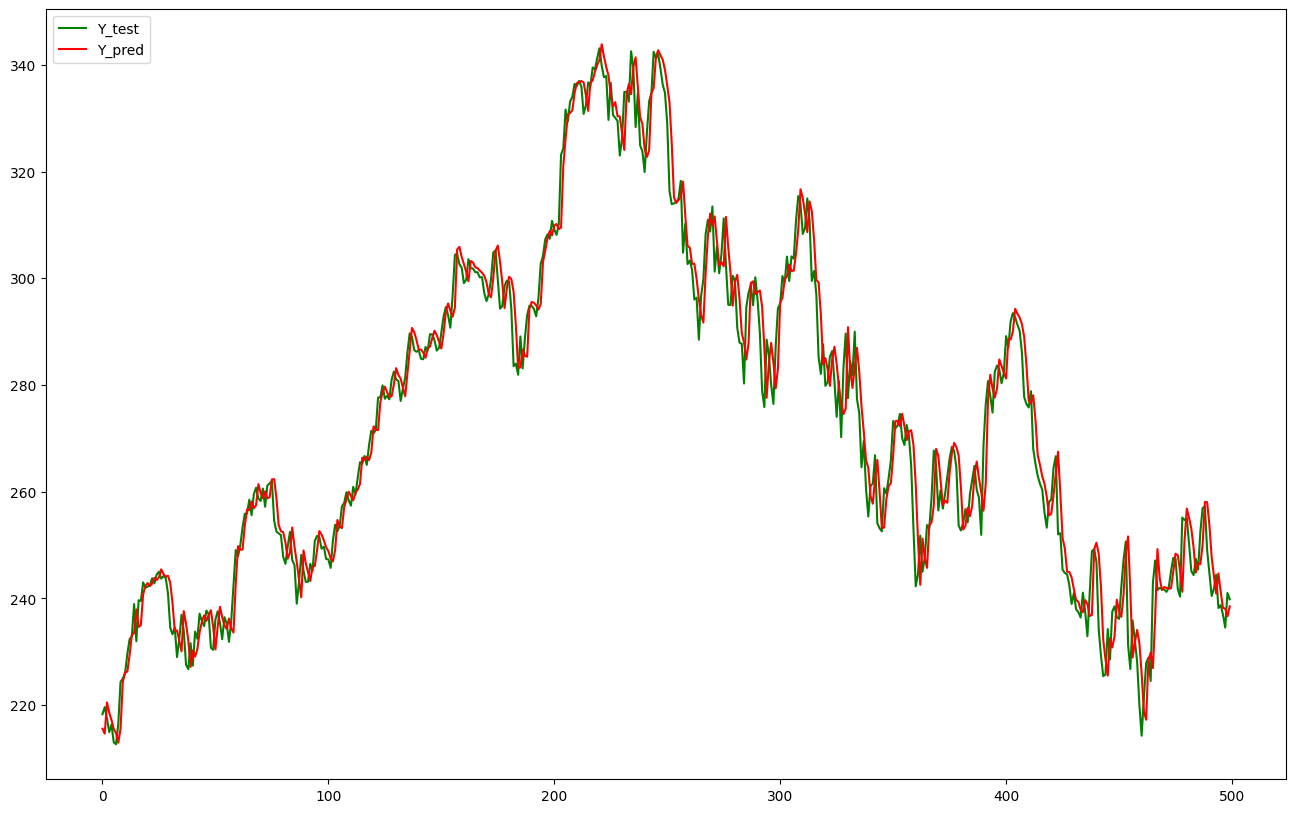

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(Y_test, color='g',label="Y_test")
plt.plot(Y_pred, color='r',label="Y_pred")
plt.legend(loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred)

30.43634747063974

## *REASONS FOR SELECTING THE TIME SERIES MODEL*

Since the microsoft data is not stationary we cannot apply ARIMA model ,So since there is volatility in the data we use GARCH model and CNN method for forcasting